In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_12240/3934898121.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


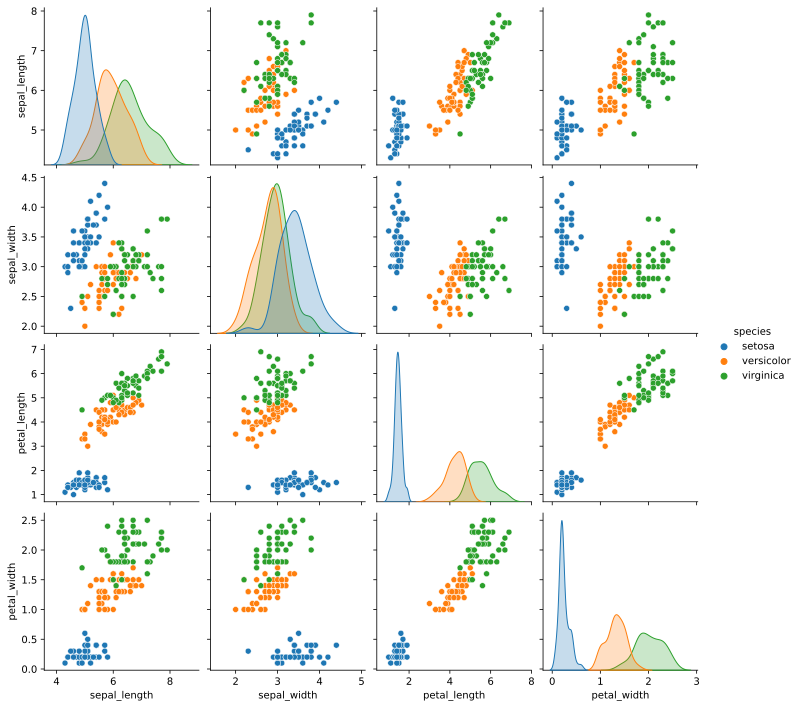

In [3]:
# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [4]:
# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float() # labels 제외

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [5]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [6]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNiris(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()              # convert to numbers (0/1)
    accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
    ongoingAcc.append( accuracyPct )              # add to list of accuracies


# final forward pass
predictions = ANNiris(data)
  
predlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [13]:
yHat.shape, yHat[:5]

(torch.Size([150, 3]),
 tensor([[  8.1019,   2.8071, -13.2300],
         [  7.1610,   2.6524, -11.9414],
         [  7.4929,   2.6014, -12.2162],
         [  6.9273,   2.5449, -11.5065],
         [  8.1445,   2.7912, -13.2447]], grad_fn=<SliceBackward>))

In [7]:
torch.argmax(yHat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Final accuracy: 98.0%


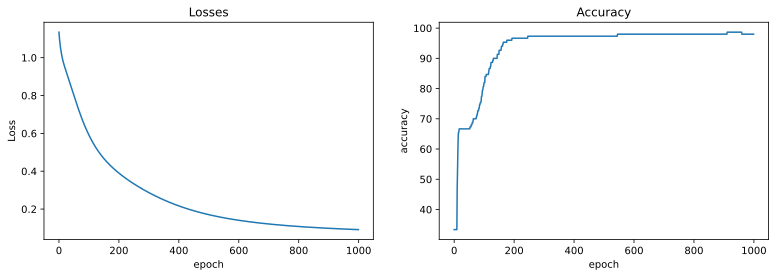

In [8]:
# report accuracy
print(f'Final accuracy: {totalacc}%')

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [15]:
# confirm that all model predictions sum to 1, but only when converted to softmax
torch.sum(yHat,axis=1) # 각 row의 sum()

tensor([-2.3210, -2.1280, -2.1219, -2.0343, -2.3090, -2.3736, -2.0653, -2.2461,
        -1.9332, -2.1866, -2.4594, -2.1555, -2.1397, -2.0119, -2.7324, -2.6387,
        -2.4588, -2.2763, -2.5111, -2.3227, -2.3556, -2.2554, -2.2467, -2.0607,
        -2.0834, -2.1296, -2.1279, -2.3396, -2.3295, -2.0737, -2.0875, -2.2887,
        -2.5203, -2.6320, -2.1389, -2.2446, -2.4783, -2.3163, -1.9688, -2.2813,
        -2.2598, -1.7499, -2.0133, -2.0446, -2.1855, -2.0451, -2.3479, -2.0714,
        -2.4230, -2.2344, -0.9597, -0.7186, -0.6662, -0.3319, -0.5154, -0.3529,
        -0.5058, -0.7498, -0.7811, -0.3513, -0.5123, -0.5657, -0.7810, -0.3871,
        -0.8617, -0.9397, -0.2283, -0.8552, -0.1515, -0.7082, -0.0282, -0.8414,
        -0.0887, -0.5099, -0.8641, -0.8598, -0.6232, -0.2875, -0.3787, -1.0509,
        -0.6745, -0.8124, -0.8070,  0.1775, -0.1295, -0.5310, -0.6934, -0.4797,
        -0.6444, -0.4264, -0.3075, -0.4972, -0.7068, -0.7509, -0.4446, -0.7154,
        -0.5889, -0.7725, -0.9218, -0.60

In [16]:
sm = nn.Softmax(1)
# yHat에 Softmax()를 씌우고 row별 합을 구해보면 전부 1이다
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

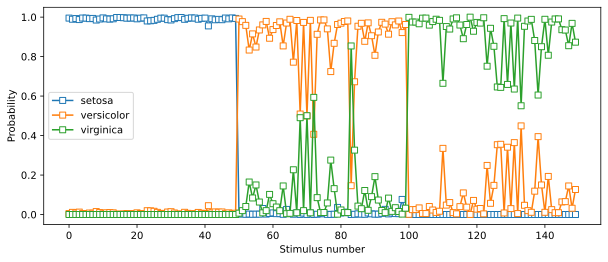

In [17]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat).detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

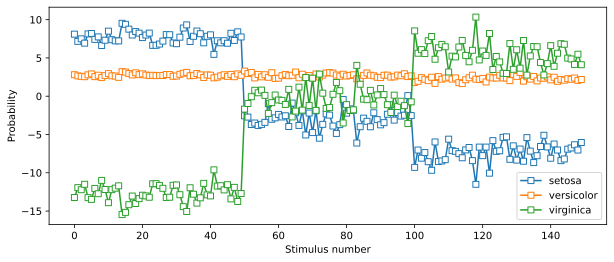

In [18]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!